<a href="https://colab.research.google.com/github/Candida18/Data-Science-Business-Analytics/blob/main/Data_Science_%26_Business_Analytics_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1><b> Prediction using Unsupervised ML </b></h1> </center>
<br>
<center><h3>To predict the minimum number of clusters from the 'Iris Dataset', and represent it visually.</h3></center>
<br>
<center> <h3>By Candida Noronha</h3> </center>
<br>
<hr>
<br>



_**Dataset : <a href="https://bit.ly/3kXTdox">https://bit.ly/3kXTdox</a>**_

<br>

_**Importing the Libraries**_

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

_**Loading the 'Iris Dataset'**_

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris_df.shape

(150, 4)

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


_**No null values present**_

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


_**Data Visualization**_

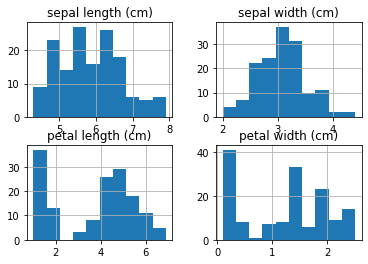

In [ ]:
iris_df.hist()
plt.show()


<hr>

### **Finding optimum number of Clusters for K-Means Classification using Elbow Method**

<br>

In [ ]:
from sklearn.cluster import KMeans

x = iris_df.iloc[:, 0:4].values
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)

_**Plotting the graph to derive the value of k**_

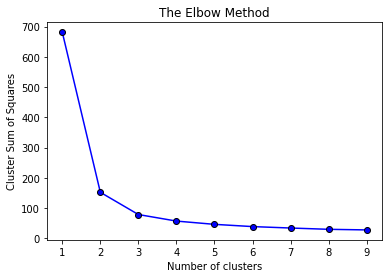

In [ ]:
plt.plot(range(1, 10), wcss,color='blue',marker='o',markeredgecolor='black')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Sum of Squares') 
print("\n")
plt.show()

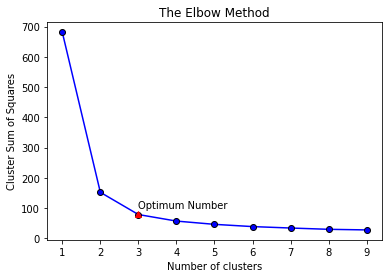

In [ ]:
print("\n")
plt.plot(range(1, 10), wcss,color='blue',marker='o',markeredgecolor='black')
plt.annotate("Optimum Number",(3,100))
plt.plot(3,80,'r^')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Sum of Squares') 
print("\n")
plt.show()

<br>

**According to the Elbow Method, the most accurate value for the number of clusters is 3**

<hr>

### **Applying the K-Means Cluster**

<br>

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

_**Visualising the Clusters**_

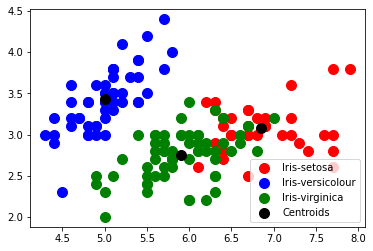

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()
print("\n")